In [15]:
%run convergence.py
%run axion_decay.py
%run test.py

In [16]:
%%time
H_inf = 2e12
f_a = 3e14
Gamma_inf_list = np.geomspace(1e6, 1e9, 11)
m_a_list = np.geomspace(1e6, 1e9, 10)
def f(Gamma_inf, m_a, i, j):
    n = i + j * len(m_a_list) + 1
    print("step:", n, "of", len(Gamma_inf_list) * len(m_a_list), end="")
    start = time.time()
    x = compute_asymmetry(H_inf, Gamma_inf, (m_a,), f_a, calc_init_time=True)
    end = time.time()
    print(" done (%f seconds)" % (end - start))
    return x
ans = np.array([[f(Gamma_inf, m_a, i, j) 
                 for i, m_a in enumerate(m_a_list)] for j, Gamma_inf in enumerate(Gamma_inf_list)])

step: 1 of 110

/home/jana/Documents/masters-project/transport_eq_in_time/convergence.py:95: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),


 done (2.292914 seconds)
step: 2 of 110 done (2.085275 seconds)
step: 3 of 110 done (2.246635 seconds)
step: 4 of 110 done (2.480667 seconds)
step: 5 of 110 done (3.161139 seconds)
step: 6 of 110 done (4.334342 seconds)
step: 7 of 110 done (6.180253 seconds)
step: 8 of 110 done (9.456916 seconds)
step: 9 of 110 done (15.206369 seconds)
step: 10 of 110 done (24.102666 seconds)
step: 11 of 110 done (1.893840 seconds)
step: 12 of 110 done (1.955714 seconds)
step: 13 of 110 done (2.043606 seconds)
step: 14 of 110 done (2.162674 seconds)
step: 15 of 110 done (2.490487 seconds)
step: 16 of 110 done (3.166773 seconds)
step: 17 of 110 done (4.303198 seconds)
step: 18 of 110 done (6.330183 seconds)
step: 19 of 110 done (10.206151 seconds)
step: 20 of 110 done (15.600764 seconds)
step: 21 of 110 done (1.963105 seconds)
step: 22 of 110 done (1.866876 seconds)
step: 23 of 110 done (1.945131 seconds)
step: 24 of 110 done (2.085470 seconds)
step: 25 of 110 done (2.357833 seconds)
step: 26 of 110 don

In [17]:
eta = ans[:, :, 0] * ans[:, :, 1]
f_numerical = ans[:, :, 0]

Text(0, 0.5, '$\\Gamma_\\mathrm{inf}$ / GeV')

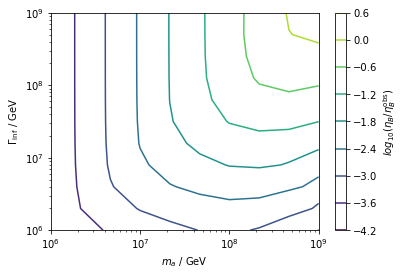

In [18]:
eta_observed = 6e-10 # from paper
plt.contour(m_a_list, Gamma_inf_list, np.log10(eta / eta_observed))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label=r"$log_{10}(\eta_B / \eta_B^\mathrm{obs})$")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")

In [24]:
 f_paper = np.array([[1 / np.maximum(1.0, 
    2*np.pi**2 * f_a**3 / (axion_motion.single_axion_field.alpha * m_a * decay_process.M_pl**2) * np.minimum(1, (Gamma_inf / m_a)**0.5))
             for m_a in m_a_list] for Gamma_inf in Gamma_inf_list])

Text(0, 0.5, '$\\Gamma_\\mathrm{inf}$ / GeV')

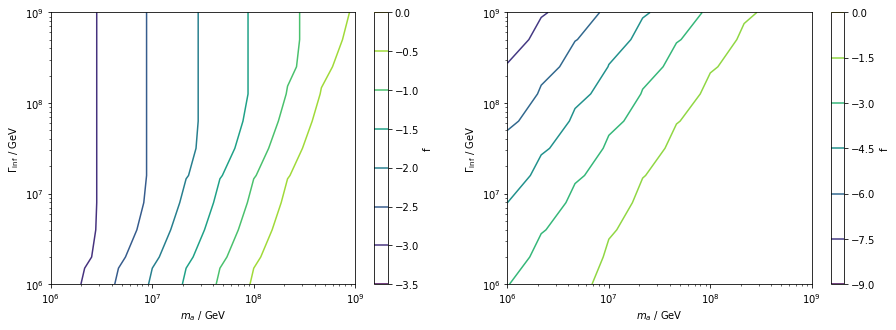

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.contour(m_a_list, Gamma_inf_list, np.log10(f_paper))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="f")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")
plt.subplot(1,2,2)
plt.contour(m_a_list, Gamma_inf_list, np.log10(f_numerical))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="f")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")

In [1]:
%run axion_decay.py
%run convergence.py

In [5]:
%run axion_decay.py

def decay(Gamma_inf, m_a, d=False, d2=False): 
    H0 = 2e10
    f_a = 3e14
    
    energy_scale = axion_motion.single_axion_field.find_dynamical_scale(m_a)
    conv_factor = Gamma_inf / energy_scale
    
    tmax_inf1 = 1 + 5
    tmax_axion1 = 1 + 2*np.pi*10
    tmax_inf2 = tmax_axion1 / conv_factor
    tmax_inf = max(tmax_inf1, tmax_inf2)
    tmax_axion = conv_factor * tmax_inf

    axion_decay_time = 10.0
    rho_inf_init = H0**2*decay_process.M_pl**2*3
    scale = decay_process.find_scale(Gamma_inf)
    tmax_axion = tmax_inf / conv_factor
    sol_rh = decay_process.solve(tmax_inf, 0.0, rho_inf_init, scale, Gamma_inf, debug=d);
    T_and_H_fn, T_and_H_and_T_dot_fn = decay_process.to_temperature_and_hubble_fns(sol_rh, rho_inf_init, scale, Gamma_inf, debug=d)
    sol_axion = axion_motion.single_axion_field.solve((1.0, 0.0), (m_a,), tmax_axion, T_and_H_fn, Gamma_inf, debug=d)
    
    Gamma_axion = axion_motion.single_axion_field.get_decay_constant(f_a, m_a)
    axion_scale = decay_process.find_scale(Gamma_axion)
    rho_end_axion = axion_motion.single_axion_field.get_energy(sol_axion.y[:, -1], f_a, m_a)
    rho_end_rad = decay_process.find_end_rad_energy(sol_rh, scale)
    sol_axion_decay = decay_process.solve(axion_decay_time, rho_end_rad, rho_end_axion, axion_scale, Gamma_axion, debug=d)
    T_and_H_fn_axion, _ = decay_process.to_temperature_and_hubble_fns(sol_axion_decay, rho_end_axion, axion_scale, Gamma_axion, debug=d)
    
    f_analytical = 1 / np.maximum(1.0, 2*np.pi**2 * f_a**3 / 
        (axion_motion.single_axion_field.alpha * m_a * decay_process.M_pl**2) * 
                                  np.minimum(1, (Gamma_inf / m_a)**0.5))
    
    theta, theta_dot = sol_axion.sol(sol_axion.t[-1])
    theta_dot *= m_a
    T_start = T_and_H_fn(np.exp(sol_rh.t[-1]))[0]
    f_old = compute_axion_decay(T_start, 1.0, theta, theta_dot, m_a, f_a, Gamma_axion)
    
    if d2:
        plt.figure()
        ts = np.geomspace(decay_process.t0, decay_process.t0 + axion_decay_time, 100) # ts is in axion decay units
        fs = decay_process.find_dilution_factor(sol_axion_decay, T_and_H_fn_axion, ts)
        plt.axhline(fs[0], ls="--", color="black", label="initial")
        plt.axhline(fs[-1], ls="-", color="black", label="final")
        plt.axhline(f_old, color="blue", label="updated old code")
        plt.loglog(ts, fs, label="evolution")
        plt.axhline(f_analytical, color="red", ls="--", label="analytical")
        plt.xlabel(r"$\Gamma_a \cdot t$")
        plt.ylabel(r"dilution factor $f = (T(t_0) a(t_0) / T(t) a(t))^3$")
        plt.legend()

    f = decay_process.find_dilution_factor(sol_axion_decay, T_and_H_fn_axion, axion_decay_time)
    return f, f_analytical, f_old

Gamma_inf_list = np.geomspace(1e6, 1e9, 11)
m_a_list = np.geomspace(1e6, 1e9, 10)

fs = np.array([[decay(Gamma_inf, m_a) for m_a in m_a_list] for Gamma_inf in Gamma_inf_list])

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


interval: -9.664782674661408 41.89162470333911
delta = 1705.881918687657 vs 0.001
interval: 41.89162470333911 41.986934883143434
delta = 9.070671625886549e-05 vs 0.001


/home/jana/Documents/masters-project/transport_eq_in_time/axion_decay.py:18: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/masters-project/transport_eq_in_time/axion_decay.py:21: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


interval: -8.894294485092493 39.58903961034507
delta = 516.8153994728118 vs 0.001
interval: 39.58903961034507 39.68434979014939
delta = 9.067935591871116e-05 vs 0.001
interval: -8.125395989179957 37.28645451735102
delta = 97.95757362647949 vs 0.001
interval: 37.28645451735102 37.38176469715534
delta = 9.040970037381219e-05 vs 0.001
interval: -7.357231862203561 34.983869424356975
delta = 14.106298712860811 vs 0.001
interval: 34.983869424356975 35.0791796041613
delta = 8.729176959553165e-05 vs 0.001
interval: -6.589408665876548 32.68128433136293
delta = 4.777262508324151e-14 vs 0.001
interval: -5.821743959253693 30.37869923836889
delta = 2.727020681834962e-14 vs 0.001
interval: -5.05415146281102 28.076114145374838
delta = 2.8862627654457274e-14 vs 0.001
interval: -4.286594015181996 25.773529052380802
delta = 2.1895786496485112e-14 vs 0.001
interval: -3.519051768748474 23.47094395938675
delta = 1.3933682315945018e-14 vs 0.001
interval: -2.7515170262273565 21.1683588663927
delta = 1.532705

Text(0.5, 1.0, 'program')

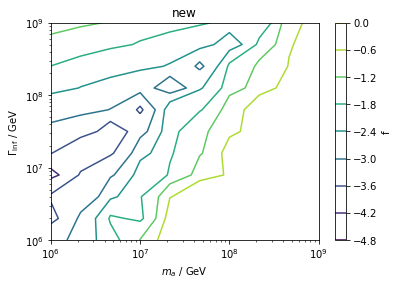

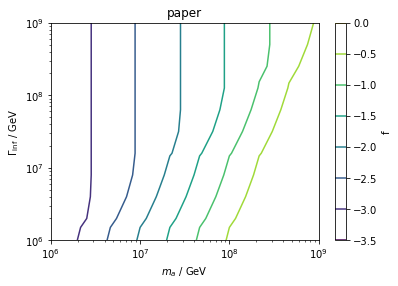

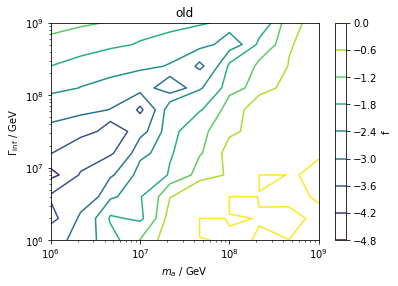

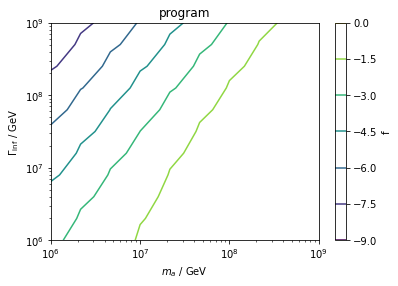

In [14]:
for i, name in enumerate(["new", "paper", "old"]):
    plt.figure()
    plt.contour(m_a_list, Gamma_inf_list, np.log10(fs[:, :, i]))
    plt.xscale("log")
    plt.yscale("log")
    plt.colorbar(label="f")
    plt.xlabel("$m_a$ / GeV")
    plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")
    plt.title(name)
plt.figure()
plt.contour(m_a_list, Gamma_inf_list, np.log10(ans[:,:,0]))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="f")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")
plt.title("program")

step = 1


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:81: RuntimeWarning: divide by zero encountered in true_divide
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:81: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/convergence.py:95: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),


change by timescale: nan vs 0.001
B-L range: nan nan
delta = nan convergence_rtol = 0.001
step = 2
change by timescale: 0.000871322126848434 vs 0.001
B-L range: -1.424462960762669e-08 -1.4037263516296998e-08
delta = 0.014693836404665293 convergence_rtol = 0.001
step = 3
change by timescale: 0.00024696940596418657 vs 0.001
B-L range: -1.4078454317982729e-08 -1.4017763406582605e-08
delta = 0.0043183667221193146 convergence_rtol = 0.001
step = 4
change by timescale: 9.588395114377315e-05 vs 0.001
B-L range: -1.4031424872012546e-08 -1.4001432429797308e-08
delta = 0.0021389496244865755 convergence_rtol = 0.001
step = 5


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:9: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)


change by timescale: 4.253847432113739e-05 vs 0.001
B-L range: -1.4007565558388538e-08 -1.398926957190555e-08
delta = 0.0013065971929025987 convergence_rtol = 0.001
step = 6
change by timescale: 1.9557310801528966e-05 vs 0.001
B-L range: -1.3992482077908238e-08 -1.3979975651495266e-08
delta = 0.0008939778445910563 convergence_rtol = 0.001


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:81: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


axion, rad, inf: 1.678607067065973e+43 8.38331671183592e+44 0.0


(1.4331950180976086e-09, 1.2183680828064114e-10)

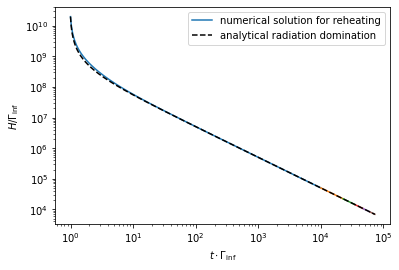

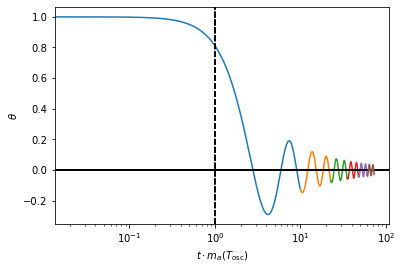

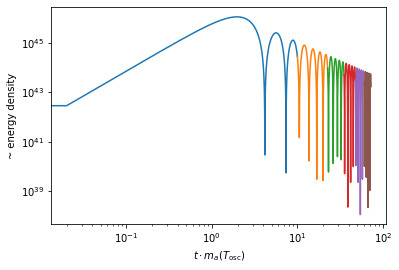

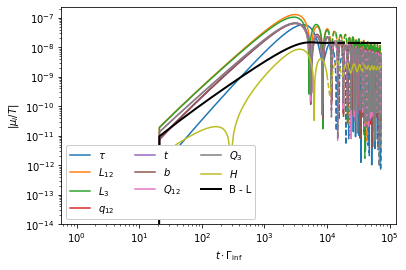

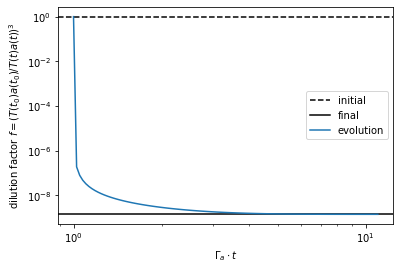

In [11]:
%run convergence.py
H_inf = 2e10
f_a = 3e14
m_a = 1e6
Gamma_inf = 1e9
compute_asymmetry(H_inf, Gamma_inf, (m_a,), f_a, calc_init_time=True, debug=True)